# Curve di POSSIBILITA' PLUVIOMETRICA 

Le curve di possibilità pluviometrica sono delle curve che permettono di ottenere l'altezza di precipitazione, assegnato un tempo di ritorno, in funzione di una durata prefissata. 

Queste curve vengono stimate utilizzando i migliori parametri a e b della funzione di Gumbel, i quali vengono ottenuti tramite il test di Pearson. 

## Importate le librerie necessarie ed i dati di studio

In [1]:
import os
import math
import numpy as np
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title
import matplotlib.pyplot as plt
from scipy.stats import genextreme,gumbel_r
from scipy.optimize import least_squares

# Importazione dei dati di studio

data = pd.ExcelFile('DatiCastelNuovoGarda.xlsx')
data.sheet_names
data=data.parse('Foglio1', header=2)
data.columns
data.rename(columns={'Unnamed: 0':'Anno'}, inplace=True)
data.rename(columns={'mm':'1h'}, inplace= True)
data.rename(columns={'mm.1':'3h'}, inplace= True)
data.rename(columns={'mm.2':'6h'}, inplace= True)
data.rename(columns={'mm.3':'12h'}, inplace= True)
data.rename(columns={'mm.4':'24h'}, inplace= True)
data.set_index('Anno', inplace= True)

## Considerati i migliori parametri (a, b) dal Test di Pearson.

In [12]:
best=pd.read_pickle("abs_mle") #legge i parametri migliori
def qtls(data,qu): #qtls: inverte le funzioni di gumbel 
    rv1h=gumbel_r(loc=data["a"],scale=data["b"]) #definisco curva di gumbel in funzione dei coefficienti di posizione e di scala 
    return rv1h.ppf(qu) #restituisco l'inversa, il quantile particolare è il campo di studio
[qtls(best["1h"],0.9),qtls(best["3h"],0.9),qtls(best["6h"],0.9),qtls(best["12h"],0.9),
 qtls(best["24h"],0.9)] # considero i valori migliori e li calcolo per 10 anni di tempo di ritorno=probabilità di 0.9

Tr1=10
Tr2=20
Tr3=100
q10=1-1/Tr1
q20=1-1/Tr2
q100=1-1/Tr3

## GRAFICO delle CURVE di POSSIBILITA' PLUVIOMETRICA 
## su scala BI-LOGARITMICA.

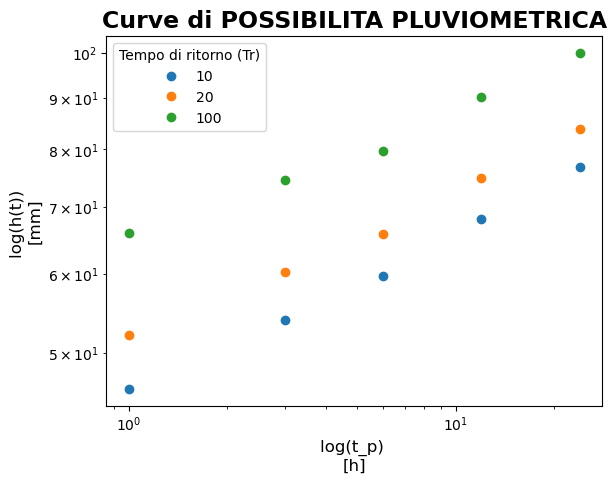

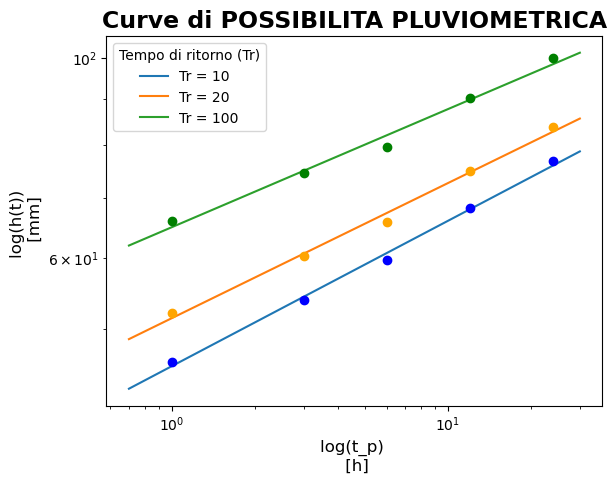

In [10]:
#GRAFICO PUNTI
#quantili corrispondenti ai dataframe con i parametri migliori per i diversi tempi
pts=DataFrame([[qtls(best['1h'],q10),
           qtls(best['3h'],q10),
           qtls(best['6h'],q10),
           qtls(best['12h'],q10),
           qtls(best['24h'],q10)],
          [qtls(best['1h'],q20),
           qtls(best['3h'],q20),
           qtls(best['6h'],q20),
           qtls(best['12h'],q20),
           qtls(best['24h'],q20)],
          [qtls(best['1h'],q100),
           qtls(best['3h'],q100),
           qtls(best['6h'],q100),
           qtls(best['12h'],q100),
           qtls(best['24h'],q100)]], index=[10 , 20 , 100 ], columns=[1, 3, 6, 12, 24]).T
#per interpolare la retta dopo aver considerato il logartimo delle ordinate e delle ascisse
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10[0]
in10[1]=np.exp(in10[1])
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])

fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl["a"][10]

tp=np.linspace(0.7,30,100)

def h(tp,a,n):
    return a*tp**n 
h10=h(tp,fnl["a"][10],fnl["n"][10])
h20=h(tp,fnl["a"][20],fnl["n"][20])
h100=h(tp,fnl["a"][100],fnl["n"][100])
inh=DataFrame([h10,h20,h100],index=["Tr = 10","Tr = 20","Tr = 100"],
              columns=tp).T


#INTERPOLAZIONE DEI PUNTI 

ag=pts.plot(style="o")
ag.set_yscale('log') 
ag.set_xscale('log')
ag.set_title('Curve di POSSIBILITA PLUVIOMETRICA', fontweight='bold', fontsize='17')
ag.set_xlabel('log(t_p) \n[h]', fontsize='12')
ag.set_ylabel('log(h(t)) \n[mm]', fontsize='12')
plt.legend(title = "Tempo di ritorno (Tr)")

ag=inh.plot()
ag.set_yscale('log')
ag.set_xscale('log')
ag.set_title('Curve di POSSIBILITA PLUVIOMETRICA',fontweight='bold', fontsize='17')
ag.set_xlabel('log(t_p) \n [h]', fontsize='12')
ag.set_ylabel('log(h(t)) \n [mm]', fontsize='12')
ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")
plt.legend(title = "Tempo di ritorno (Tr)")

## GRAFICO CURVE POSSIBILITA' PLUVIOMETRICA 

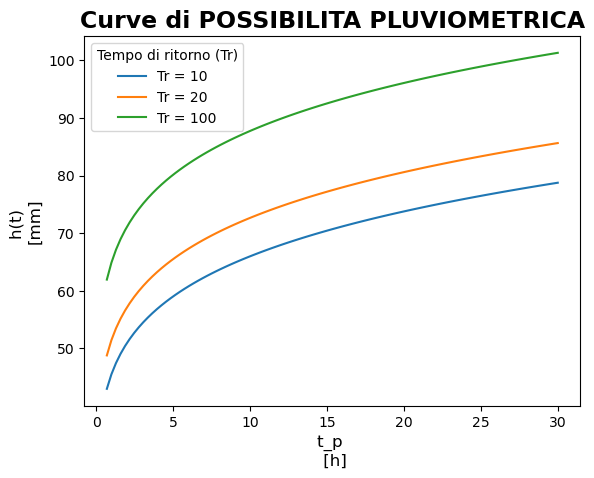

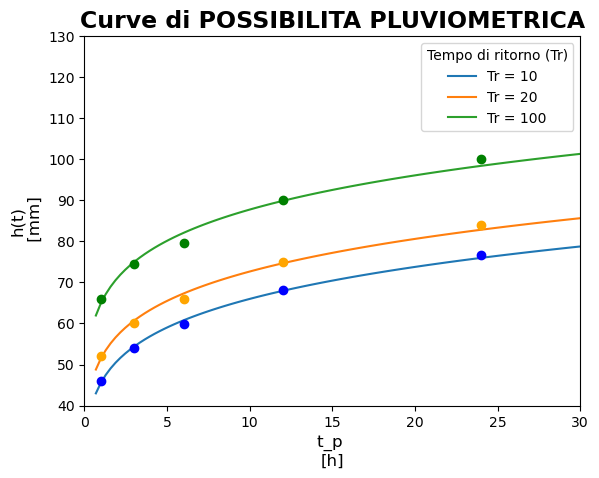

In [11]:
# PRIMO GRAFICO

agpts=inh.plot()
agpts.set_title('Curve di POSSIBILITA PLUVIOMETRICA', fontweight='bold', fontsize='17')
agpts.set_xlabel('t_p \n [h]', fontsize='12')
agpts.set_ylabel('h(t) \n[mm]', fontsize='12')
plt.legend(title = "Tempo di ritorno (Tr)")

# SECONDO GRAFICO

ag=inh.plot()
ag.set_title('Curve di POSSIBILITA PLUVIOMETRICA', fontweight='bold', fontsize='17')
ag.set_xlabel('t_p \n[h]', fontsize='12')
ag.set_ylabel('h(t)\n [mm]', fontsize='12')
ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")
plt.xlim([0,30])
plt.ylim([40,130])
plt.legend(title = "Tempo di ritorno (Tr)")